   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


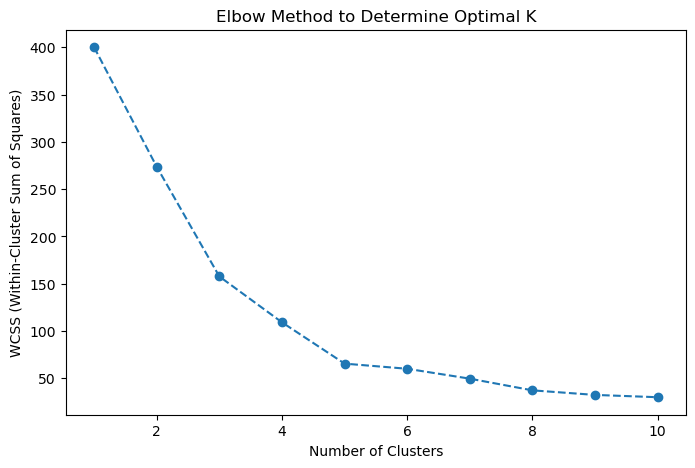

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


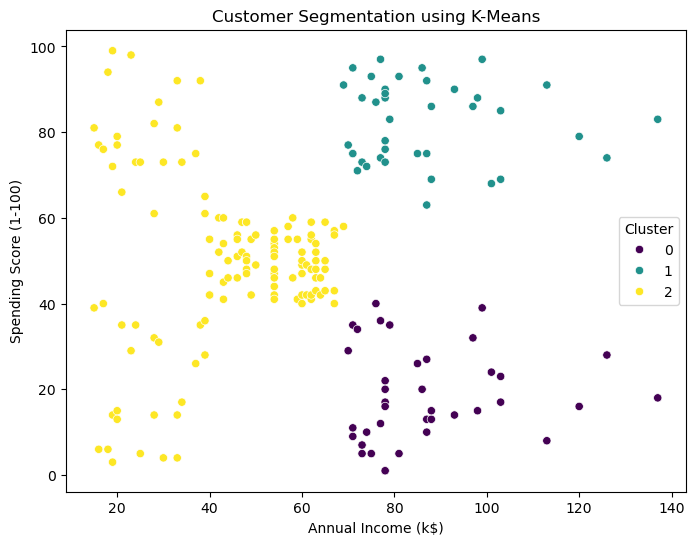

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
# Load the dataset (Replace 'customer_data.csv' with your actual file)
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Select relevant features for clustering (adjust based on your dataset)
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Normalize the data (K-Means works better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Train K-Means with the optimal number of clusters (e.g., K=3 based on the elbow plot)
optimal_k = 3  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display dataset with cluster labels
print(df.head())

# Visualize Clusters (for 2D projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend(title='Cluster')
plt.show()
warnings.simplefilter(action='ignore', category=UserWarning)
